In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
% matplotlib inline

In [22]:
#import data
ShoeData = pd.read_excel('SampleMLData.xlsx',sheetname = 'Sheet1')

In [11]:
# review data
ShoeData.head()

,Height,Weight,Shoe_size,Classification,Unnamed: 4
0,181,80,44,male,NaN
1,177,70,43,male,NaN
2,160,60,38,female,
3,154,54,37,female,NaN
4,166,65,40,male,NaN


In [12]:
# Remove uneeded column
del ShoeData['Unnamed: 4']

In [13]:
# Instantiate model
clf = LogisticRegression()

In [14]:
Y = ShoeData['Classification'].values

del ShoeData['Classification']

X = ShoeData.values

clf.fit(X, Y)

prediction = clf.predict([[190, 70, 43]])

print prediction

[u'female']


In [15]:
weights = pd.Series(clf.coef_[0],
                    index=ShoeData.columns)

weights

Height      -0.439204
Weight       0.622762
Shoe_size    0.829036
dtype: float64

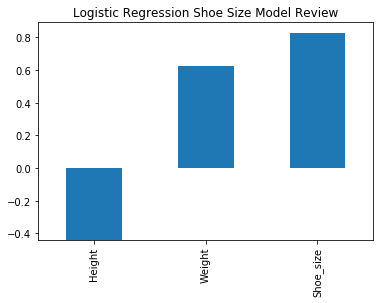

In [30]:
weights.plot(kind='bar',title = 'Logistic Regression Shoe Size Model Review')

In [17]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

In [18]:
clf.fit(X, Y)

prediction = clf.predict([[190, 70, 43]])

print prediction

[u'male']


In [29]:
dot_data = tree.export_graphviz(clf, feature_names=ShoeData.columns,  class_names = ShoeData.columns,
                          out_file='tree.dot') 

#http://www.webgraphviz.com/
# http://stackoverflow.com/questions/1494492/graphviz-how-to-go-from-dot-to-a-graph